In [ ]:
## This noteboook computes the Alan variance and deviation of laser intensity fluctuations of a dataset.
## It then uses matplotlib for plotting.
#from numpy import array, exp, genfromtxt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##########################functions########################################

def remainder(n, m):
    quotient = n // m
    remainder = n % m
    return remainder
    #print(f"Quotient: {quotient}, Remainder: {remainder}")

N of elements of each average: 2, N of averages being computed: 5042
N of elements of each average: 3, N of averages being computed: 2521
N of elements of each average: 4, N of averages being computed: 1680
N of elements of each average: 5, N of averages being computed: 1260
N of elements of each average: 6, N of averages being computed: 1008
N of elements of each average: 7, N of averages being computed: 840
N of elements of each average: 8, N of averages being computed: 720
N of elements of each average: 9, N of averages being computed: 630
N of elements of each average: 10, N of averages being computed: 560
N of elements of each average: 11, N of averages being computed: 504
N of elements of each average: 12, N of averages being computed: 458
N of elements of each average: 13, N of averages being computed: 420
N of elements of each average: 14, N of averages being computed: 387
N of elements of each average: 15, N of averages being computed: 360
N of elements of each average: 16, N 

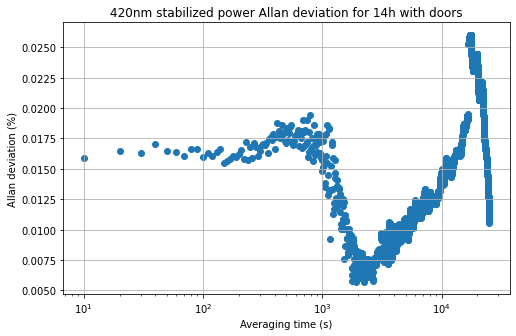

In [3]:


path = 'C:\\Users\\Hodei\\OneDrive\\python-programak'

totaldata = np.genfromtxt(path+'\\420_SHGoutput_14h_withStab_sghlock.csv', delimiter=',', skip_header=1)

##########################powers and mean power########################################
x = totaldata[:,1]
powers = totaldata[:,4]
meanpower = np.mean(powers)

##########################averages########################################
yallan = np.zeros(len(x))
yallandev = np.zeros(len(x))
mean = np.zeros(len(x))
std = np.zeros(len(x))

for j in range(1, int(len(totaldata[:,4])/2)):
    powers = totaldata[:,4]
    rm = remainder(len(powers), j)
    #print(rm)
#We remove elements from powers to make it divisible by the number of elements j over which we average for a time interval    
    for i in range(0,rm):
        powers = np.delete(powers, len(powers)-1)
#We calculate averages over slices made of a j number elements       
    for i in range(len(powers[::j])):
        powermeans = np.mean(powers.reshape(-1, j), axis=1)
    shifted_powermeans = np.roll(powermeans,-1)        

    y = (powermeans-shifted_powermeans)/meanpower
    y = np.delete(y, len(y)-1)
    y = y**2
    print(f"N of elements of each average: {j+1}, N of averages being computed: {len(powermeans)}")
    yallan[j-1] = np.sum(y)/(2*len(y))
    yallandev[j-1] = np.sqrt(yallan[j-1])
    #mean[j-1] = np.mean(np.abs(y))
    #std[j-1] = np.std(y, ddof=1)

############################################plotting##################################################

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x[0:int(len(totaldata[:,4])/2-1)], yallandev[0:int(len(totaldata[:,4])/2-1)]*100)
ax.set_xscale('log')
#plt.errorbar(x,y,yer,xerr=None,ls='none')
plt.title("420nm stabilized power Allan deviation for 14h with doors")
plt.xlabel('Averaging time (s)')
plt.ylabel('Allan deviation (%)')
#plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
#plt.xlim([1, int((len(totaldata[:,4])-1)*10/3)])
#plt.ylim([0, 9e-8])
#plt.savefig(path+'\\420_stab_14h_allandevfull.jpg', dpi=300, bbox_inches='tight')
plt.show()

